## Green Destination Company Attrition Status Study

importing needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset import and exploration

In [2]:
data = pd.read_csv('C:/Users/Lenovo/Downloads/greendestination (1).csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Observation:
The dataset contains 1470 rows and 35 columns, of which 26 are of int and 9 of string type. All having non-null values.

In [5]:
# data.isnull().sum()

In [6]:
years = data.iloc[:,31:]

In [7]:
years['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

In [8]:
years.sort_values(by='YearsInCurrentRole',ascending=False).head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
190,33,18,11,9
123,20,18,15,15
1024,20,17,5,6
1351,22,17,4,7
231,22,17,11,15


Plotting a countplot for checking the number of male and female employees that are working for Years at the company

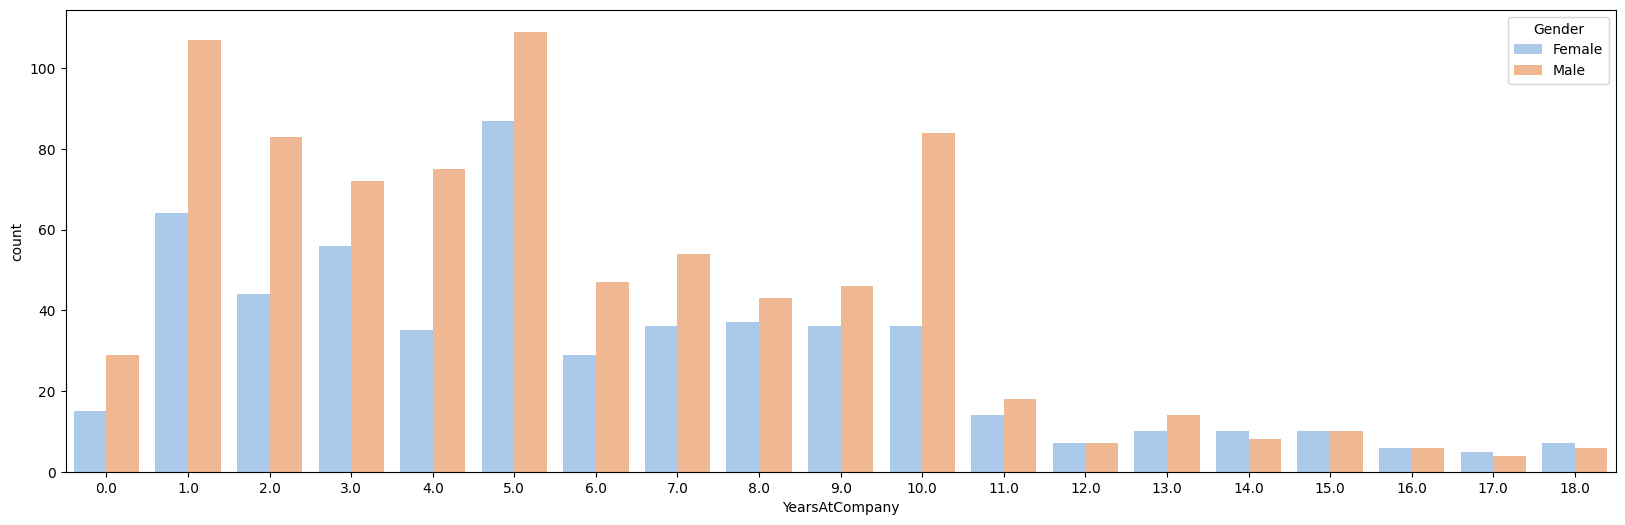

In [46]:
# sns.distplot(years['YearsInCurrentRole'])
plt.figure(figsize=(20,6))
# plt.scatter(data=data,x='Gender', y='YearsAtCompany', color='purple', marker='o')
sns.countplot(data=data, hue='Gender', x='YearsAtCompany', palette='pastel')
plt.legend
plt.show()

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Dropping not required columns

In [11]:
drop_columns= [ 'DailyRate', 'PerformanceRating',
       'EmployeeNumber','HourlyRate', 'DistanceFromHome',
       'JobInvolvement', 'JobLevel','MonthlyRate', 'NumCompaniesWorked',
       'Over18','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear','YearsInCurrentRole',
       'YearsWithCurrManager' ]

In [12]:
data.drop(drop_columns, axis=1, inplace=True)

In [13]:
data.head()

,Age,Attrition,BusinessTravel,Department,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,2,Life Sciences,1,2,Female,Sales Executive,4,Single,5993,Yes,11,1,1,6,0
1,49,No,Travel_Frequently,Research & Development,1,Life Sciences,1,3,Male,Research Scientist,2,Married,5130,No,23,4,3,10,1
2,37,Yes,Travel_Rarely,Research & Development,2,Other,1,4,Male,Laboratory Technician,3,Single,2090,Yes,15,2,3,0,0
3,33,No,Travel_Frequently,Research & Development,4,Life Sciences,1,4,Female,Research Scientist,3,Married,2909,Yes,11,3,3,8,3
4,27,No,Travel_Rarely,Research & Development,1,Medical,1,1,Male,Laboratory Technician,2,Married,3468,No,12,4,3,2,2


In [47]:
#check the shape now
data.shape

(1470, 19)

Describe basically helps in showing the mean, minimum, maximum, standard deviation and other values for a particular column except string/object type

In [15]:
# data[data.duplicated()]
# data.isnull().sum()
data.describe()

,Age,Education,EmployeeCount,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,1.0,2.721769,2.728571,6502.931293,15.209524,2.712245,2.761224,7.008163,2.187755
std,9.135373,1.024165,0.0,1.093082,1.102846,4707.956783,3.659938,1.081209,0.706476,6.126525,3.222430
min,18.000000,1.000000,1.0,1.000000,1.000000,1009.000000,11.000000,1.000000,1.000000,0.000000,0.000000
25%,30.000000,2.000000,1.0,2.000000,2.000000,2911.000000,12.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,3.000000,1.0,3.000000,3.000000,4919.000000,14.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,4.000000,1.0,4.000000,4.000000,8379.000000,18.000000,4.000000,3.000000,9.000000,3.000000
max,60.000000,5.000000,1.0,4.000000,4.000000,19999.000000,25.000000,4.000000,4.000000,40.000000,15.000000


#### Observation:
We can observe that the mean count for an employee to work at this company igs given to be just 7 years, though a few have even gone for 40. mean age for an employee working here is: 36. Mean salary per month is: 6502.93 and with a minimum salary hike of 15%.

Plotted a `Barplot` for employees that have been working for years in this company and their mean, and median values of choosing to stay or leave the company

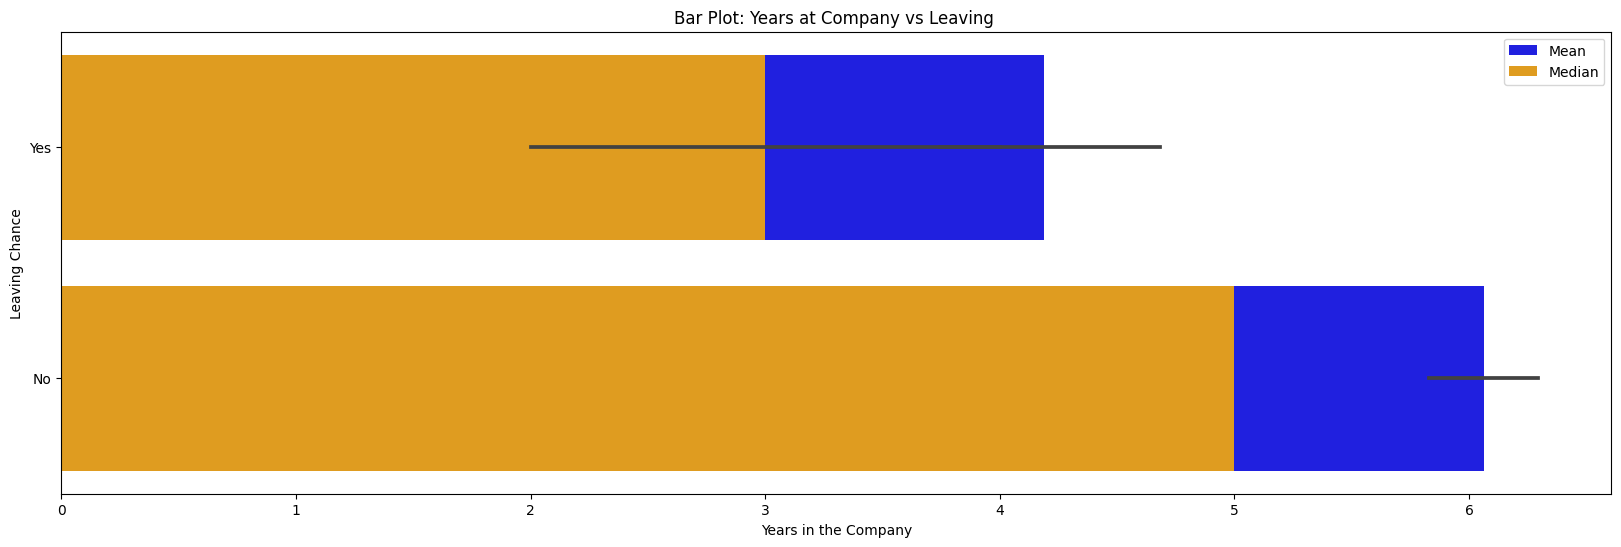

In [42]:

plt.figure(figsize=(20,6))
sns.barplot(data=data, x='YearsAtCompany', y='Attrition', estimator=np.mean, label='Mean', color='blue')

# Median
sns.barplot(data=data, x='YearsAtCompany', y='Attrition', estimator=np.median, label='Median', color='orange')

plt.title('Bar Plot: Years at Company vs Leaving ')
plt.xlabel('Years in the Company')
plt.ylabel('Leaving Chance')
plt.legend()

# Show the plot
plt.show()


### Observation:
Those who have stayed for longer years in the company have less chances or are less likely to leave.

In [17]:
g = list(data)
g

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

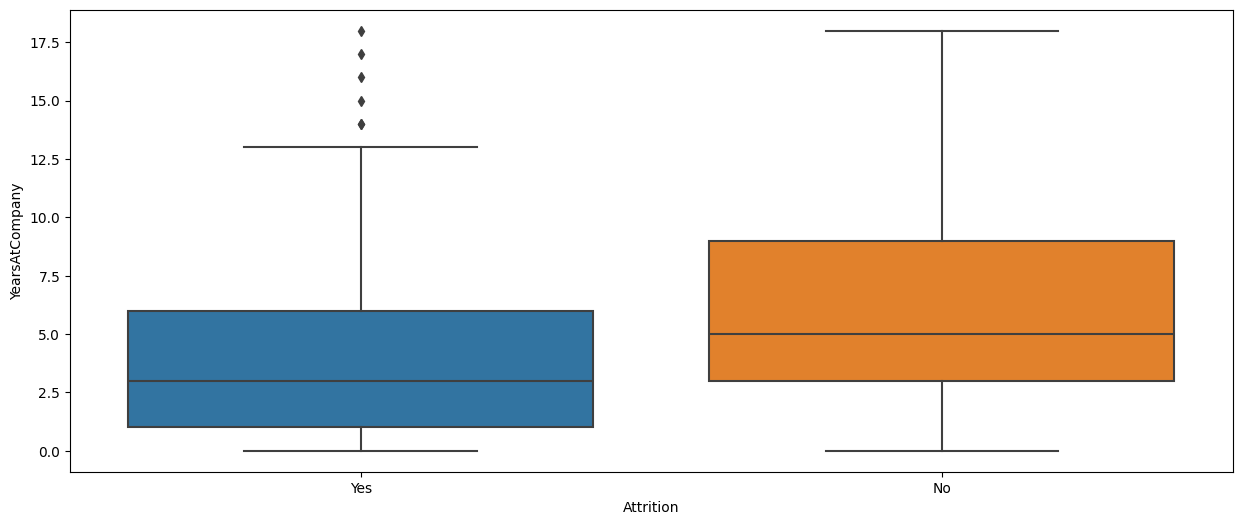

In [55]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data)

##### Removing Outliers

In [18]:
# #removing Outliers
# ## define Q1 and Q3
# #since we were taking outliers of YearsAtCompany, therefore
yc = list(data['YearsAtCompany'])
Q1 = np.percentile(yc, 25)
Q3 = np.percentile(yc, 75)

# # define IQR (interquantile range) 
IQR =  Q3 - Q1  

low = Q1-1.5*IQR
upp = Q3+1.5*IQR

# Find outliers
outliers = (data['YearsAtCompany'] < low) | (data['YearsAtCompany'] > upp)

# Update DataFrame by removing outliers
data.loc[outliers, 'YearsAtCompany'] = np.nan  # Set outliers to NaN or any other value

# Display the updated DataFrame
# data.isnull().sum()
data2=data.dropna()

In [19]:
low, upp

(-6.0, 18.0)

Data without outliers is kept in a new dataframe `data2`, which will be used further

### `Pivot Tables`

In [20]:
# These interactions can be better seen through pivot tables, which are basically part of excel sheets
%pip install pivottablejs

Note: you may need to restart the kernel to use updated packages.


In [21]:
# from sklearn import preprocessing

# Le = preprocessing.LabelEncoder()


In [22]:
# data['Gender'] = Le.fit_transform(data['Gender'])

In [23]:
data2.head()

,Age,Attrition,BusinessTravel,Department,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,2,Life Sciences,1,2,Female,Sales Executive,4,Single,5993,Yes,11,1,1,6.0,0
1,49,No,Travel_Frequently,Research & Development,1,Life Sciences,1,3,Male,Research Scientist,2,Married,5130,No,23,4,3,10.0,1
2,37,Yes,Travel_Rarely,Research & Development,2,Other,1,4,Male,Laboratory Technician,3,Single,2090,Yes,15,2,3,0.0,0
3,33,No,Travel_Frequently,Research & Development,4,Life Sciences,1,4,Female,Research Scientist,3,Married,2909,Yes,11,3,3,8.0,3
4,27,No,Travel_Rarely,Research & Development,1,Medical,1,1,Male,Laboratory Technician,2,Married,3468,No,12,4,3,2.0,2


In [24]:
pd.crosstab(index=[data2['Education'], data2['Department'], data2['JobRole']],
            columns=data2['Attrition'],
            margins=True,
            values=data2['Gender'].astype("category"),
            aggfunc='count',
            margins_name='Total',)

Attrition                                                       No    Yes  \
Education Department             JobRole                                    
1         Human Resources        Human Resources               4.0    1.0   
          Research & Development Healthcare Representative    10.0    2.0   
                                 Laboratory Technician        26.0    8.0   
                                 Manager                       1.0    1.0   
                                 Manufacturing Director       13.0    1.0   
                                 Research Director             6.0    NaN   
                                 Research Scientist           30.0    7.0   
          Sales                  Manager                       2.0    NaN   
                                 Sales Executive              21.0    3.0   
                                 Sales Representative         13.0    7.0   
2         Human Resources        Human Resources               9.0    2.0   
          Research & Development Healthcare Representative    17.0    3.0   
                                 Laboratory Technician        44.0   12.0   
                                 Manager                       5.0    NaN   
                                 Manufacturing Director       32.0    1.0   
                                 Research Director            10.0    NaN   
                                 Research Scientist           38.0    7.0   
          Sales                  Manager                       5.0    NaN   
                                 Sales Executive              53.0   11.0   
                                 Sales Representative          8.0    7.0   
3         Human Resources        Human Resources              18.0    4.0   
                                 Manager                       1.0    NaN   
          Research & Development Healthcare Representative    44.0    3.0   
                                 Laboratory Technician        72.0   31.0   
                                 Manager                      14.0    1.0   
                                 Manufacturing Director       48.0    2.0   
                                 Research Director            22.0    NaN   
                                 Research Scientist          101.0   18.0   
          Sales                  Manager                      10.0    NaN   
                                 Sales Executive              93.0   20.0   
                                 Sales Representative         16.0   16.0   
4         Human Resources        Human Resources               7.0    3.0   
                                 Manager                       4.0    NaN   
          Research & Development Healthcare Representative    39.0    NaN   
                                 Laboratory Technician        47.0   11.0   
                                 Manager                       7.0    1.0   
                                 Manufacturing Director       32.0    4.0   
                                 Research Director            19.0    NaN   
                                 Research Scientist           64.0   14.0   
          Sales                  Manager                       3.0    NaN   
                                 Sales Executive              78.0   19.0   
                                 Sales Representative         13.0    3.0   
5         Human Resources        Human Resources               2.0    1.0   
          Research & Development Healthcare Representative     2.0    NaN   
                                 Laboratory Technician         5.0    NaN   
                                 Manager                       2.0    NaN   
                                 Manufacturing Director        3.0    1.0   
                                 Research Director             6.0    NaN   
                                 Research Scientist            7.0    1.0   
          Sales                  Manager                       2.0    NaN

#### Observation:
The information gathered through this table is that most of the employees who are leaving of both genders belong to the sales, and research development team/dept. and have had a 3rd level of education. 

In [25]:
pd.crosstab(index=[data2['EducationField'],data2['OverTime'],data2['MaritalStatus']],
            columns=data2['Attrition'],
            margins=True,
            values=data2['EmployeeCount'],
            aggfunc='count',
            margins_name='Total',)

Attrition                                    No    Yes  Total
EducationField   OverTime MaritalStatus                      
Human Resources  No       Divorced          1.0    1.0      2
                          Married          10.0    3.0     13
                          Single            1.0    NaN      1
                 Yes      Divorced          1.0    3.0      4
                          Married           3.0    NaN      3
                          Single            1.0    NaN      1
Life Sciences    No       Divorced         89.0    3.0     92
                          Married         171.0   13.0    184
                          Single          114.0   21.0    135
                 Yes      Divorced         23.0    7.0     30
                          Married          52.0   16.0     68
                          Single           31.0   26.0     57
Marketing        No       Divorced         19.0    3.0     22
                          Married          46.0    4.0     50
                          Single           22.0    6.0     28
                 Yes      Divorced          8.0    2.0     10
                          Married          14.0    5.0     19
                          Single            4.0   12.0     16
Medical          No       Divorced         63.0    5.0     68
                          Married         127.0    9.0    136
                          Single           93.0   15.0    108
                 Yes      Divorced         24.0    5.0     29
                          Married          43.0   17.0     60
                          Single           17.0   10.0     27
Other            No       Divorced         12.0    1.0     13
                          Married          20.0    1.0     21
                          Single           17.0    1.0     18
                 Yes      Divorced          5.0    1.0      6
                          Married          11.0    1.0     12
                          Single            2.0    6.0      8
Technical Degree No       Divorced         17.0    1.0     18
                          Married          38.0    5.0     43
                          Single           18.0   12.0     30
                 Yes      Divorced          6.0    1.0      7
                          Married          11.0    4.0     15
                          Single            5.0    7.0     12
Total                                    1139.0  227.0   1366

#### Observation:
Another cross-table for processing some of the reasons behind the attrition. Here we got to know, that the employees who belonged to the research development and sales dept., and were mainly from `Life science and Medical Field`. This table also shows that those employees did more overtime and their marriage status was single and some were married also (such as, the Medical ones).


We can also work on an interactive pivot table and drop to conclusions by trying the below link!

In [26]:
from pivottablejs import pivot_ui
from IPython.display import HTML, FileLink, display

# Create pivot table and save it as an HTML file
pivot_ui(data2, outfile_path='pivottablejs.html')

# Create a link to the uploaded file
file_link = FileLink('pivottablejs.html')

# Display the link
display(file_link)

C:\Users\Lenovo\Downloads\pivottablejs.html

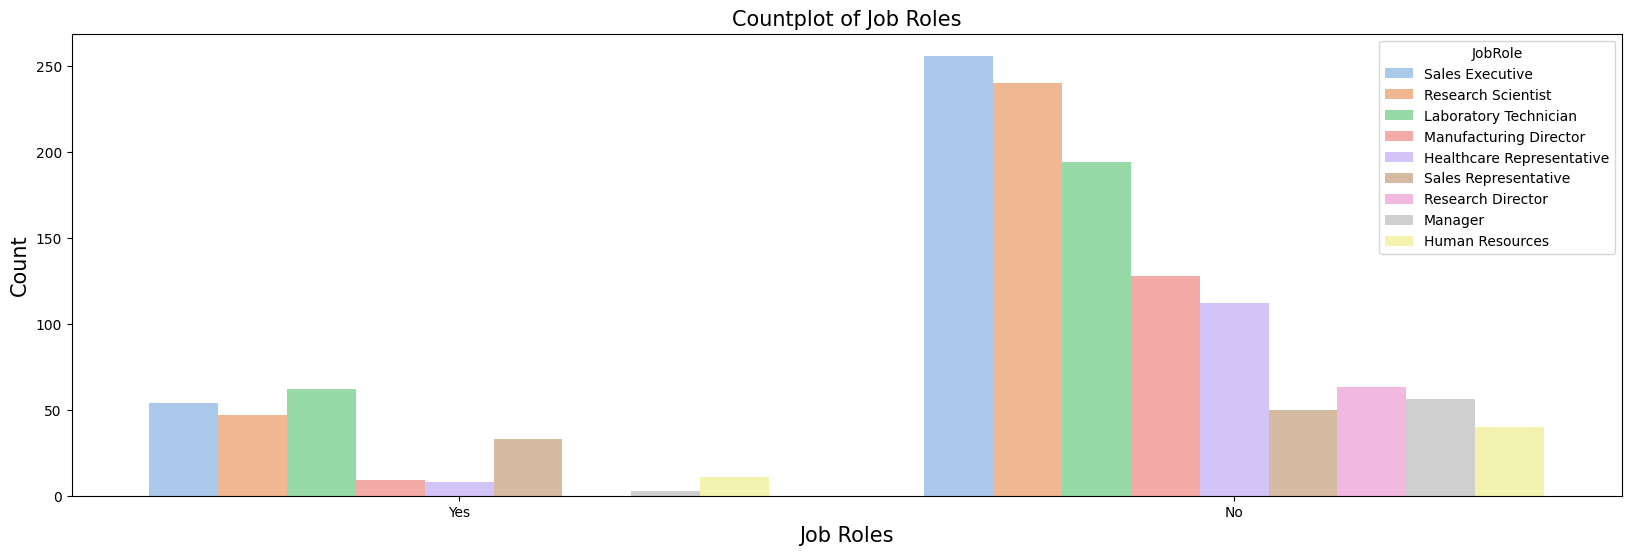

In [65]:
plt.figure(figsize=(20,6))

sns.countplot(data=data2, hue='JobRole', x='Attrition', palette='pastel')  # Change 'pastel' to your desired color palette
plt.title('Countplot of Job Roles', fontsize=15)
plt.xlabel('Job Roles', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

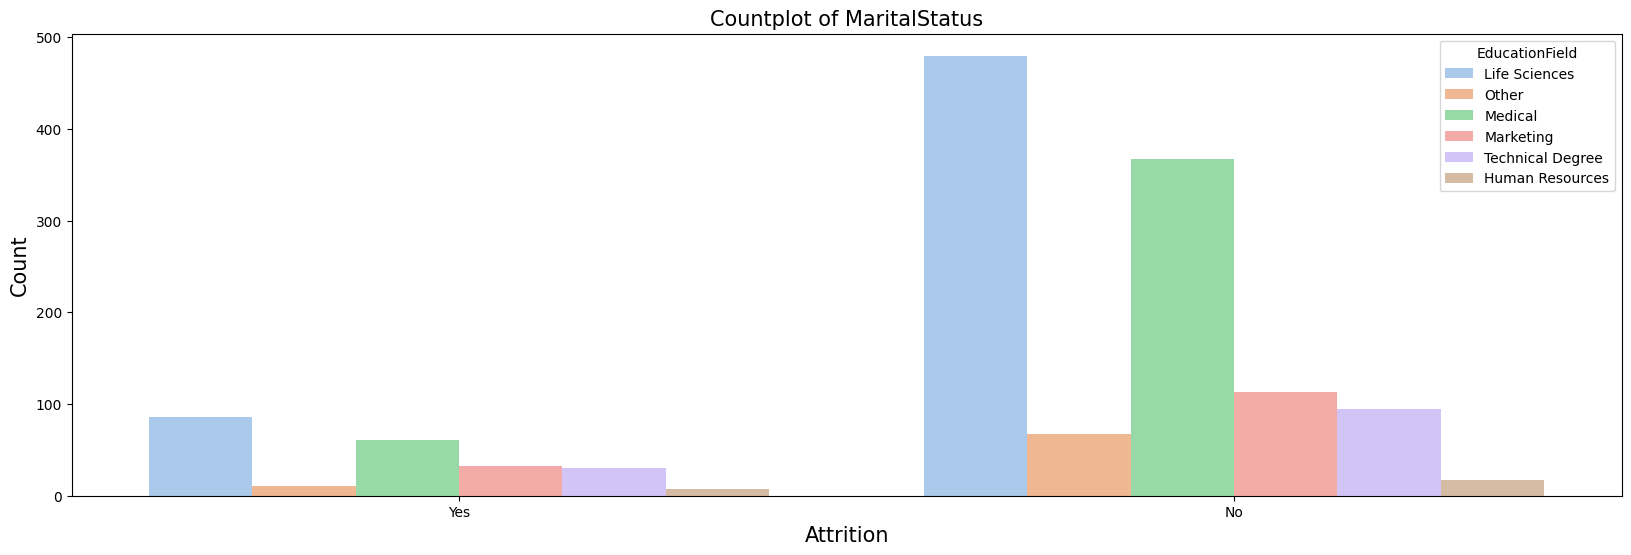

In [64]:
plt.figure(figsize=(20,6))

sns.countplot(data=data2, hue='EducationField', x='Attrition', palette='pastel')  # Change 'pastel' to your desired color palette
plt.title('Countplot of MaritalStatus', fontsize=15)
plt.xlabel('Attrition', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

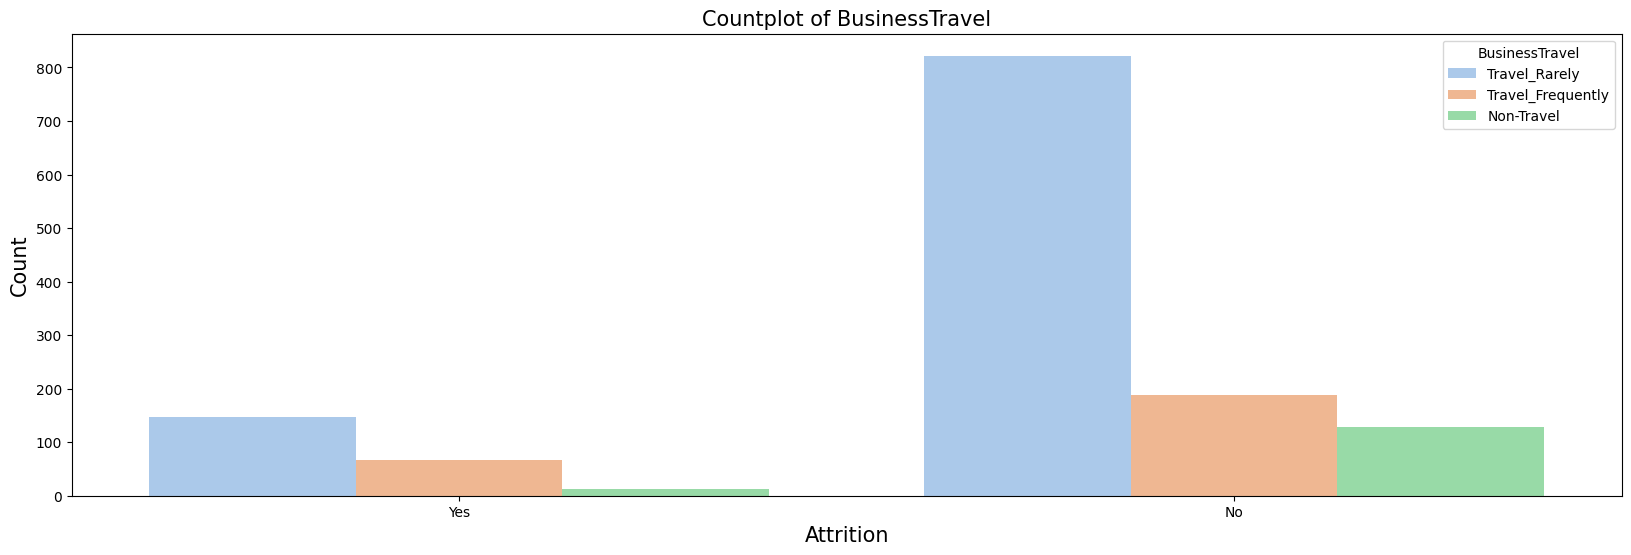

In [63]:
plt.figure(figsize=(20,6))

sns.countplot(data=data2, hue='BusinessTravel', x='Attrition', palette='pastel')  # Change 'pastel' to your desired color palette
plt.title('Countplot of BusinessTravel', fontsize=15)
plt.xlabel('Attrition', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

#### Observation of above 3 countplots:
 1. Sales Executive, Research Scientist, and Laboratory Technician having high Attrition. This could also be because their similar job posts number who are staying, which is already high in that company and might be a cause of competition
 
 2. As discussed earlier the Employees from Life science and Medical field are leaving, also due to the same reason as mentioned in 1st point, as the high number of employees who are staying is also of the same two fields
 
 3. 3rd plot says that, travel rarely are involved in the attrition

C:\Users\Lenovo\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


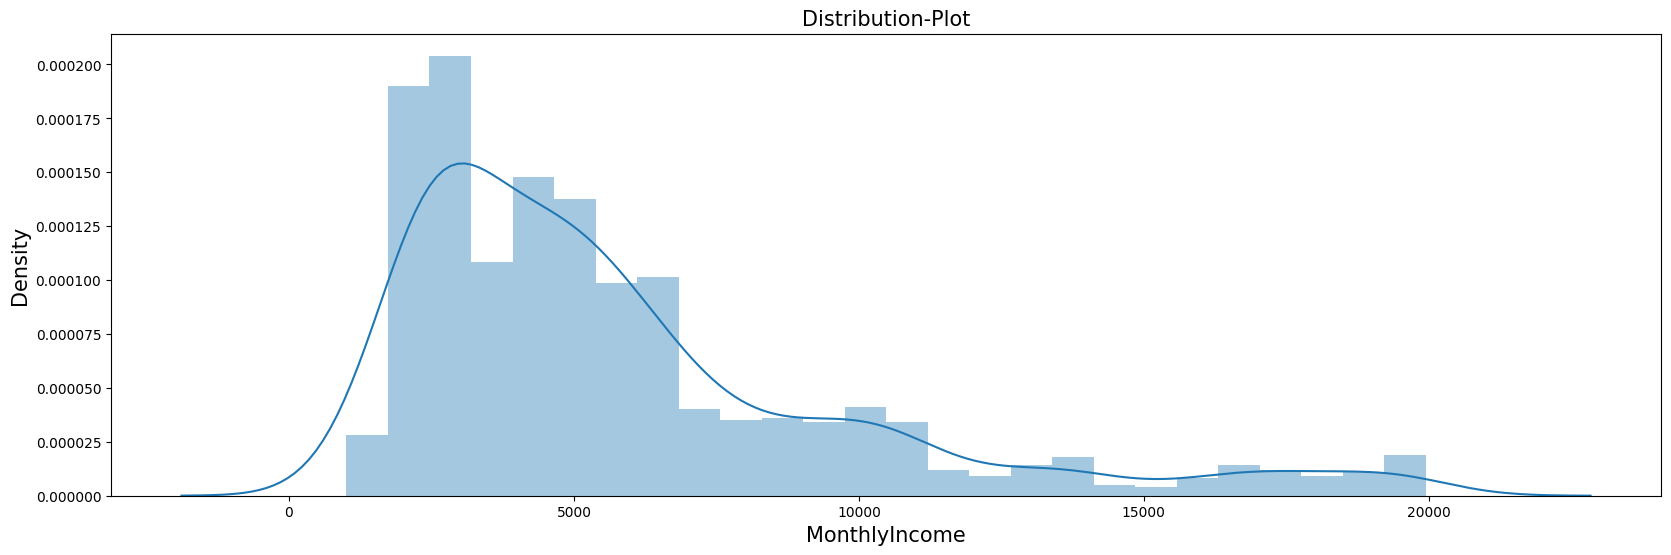

In [67]:
# sns.distplot(data2['WorkLifeBalance'])
plt.figure(figsize=(20,6))
sns.distplot(data2['MonthlyIncome'])
plt.xlabel('MonthlyIncome', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Distribution-Plot', fontsize=15)
plt.show()

#### Observation: 
checking the Monthly Income Distribution, which is Right- or Positively- Skewed and the highest range lies between 2000 to 7000.

Scatterplot for showing relation between Employees that have worked for years in this company with respect to what their age is.

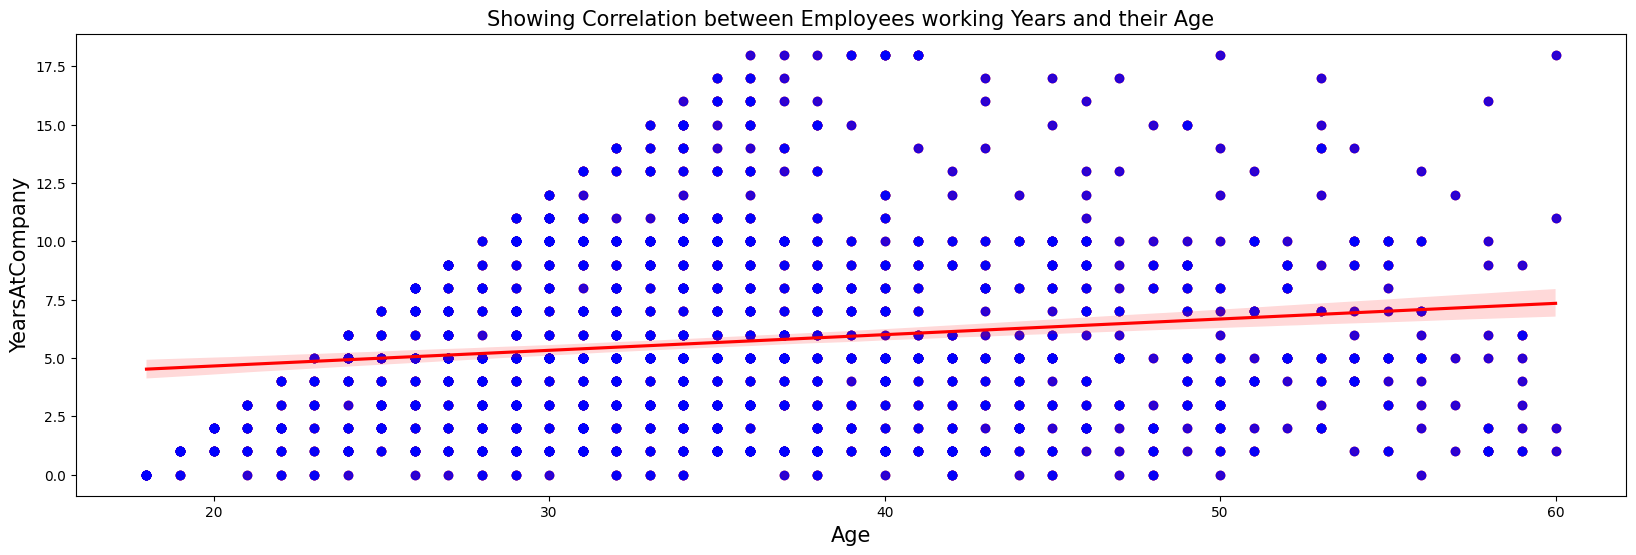

In [60]:
fig, ax = plt.subplots(figsize=(20,6))

y= data2['YearsAtCompany']
x = data2['Age']
plt.scatter(x, y, color='r')
sns.regplot(x, y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
# plt.title('Scatter Plot with Regression Line')
plt.title('Showing Correlation between Employees working Years and their Age', fontsize=15)
plt.ylabel('YearsAtCompany', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.show()

#### Observation for above plot: there's a positive correlation between Employees working Years and their Age


Scatterplot for showing relation between Employees that have worked for years in this company with respect to what their Monthly Income is.

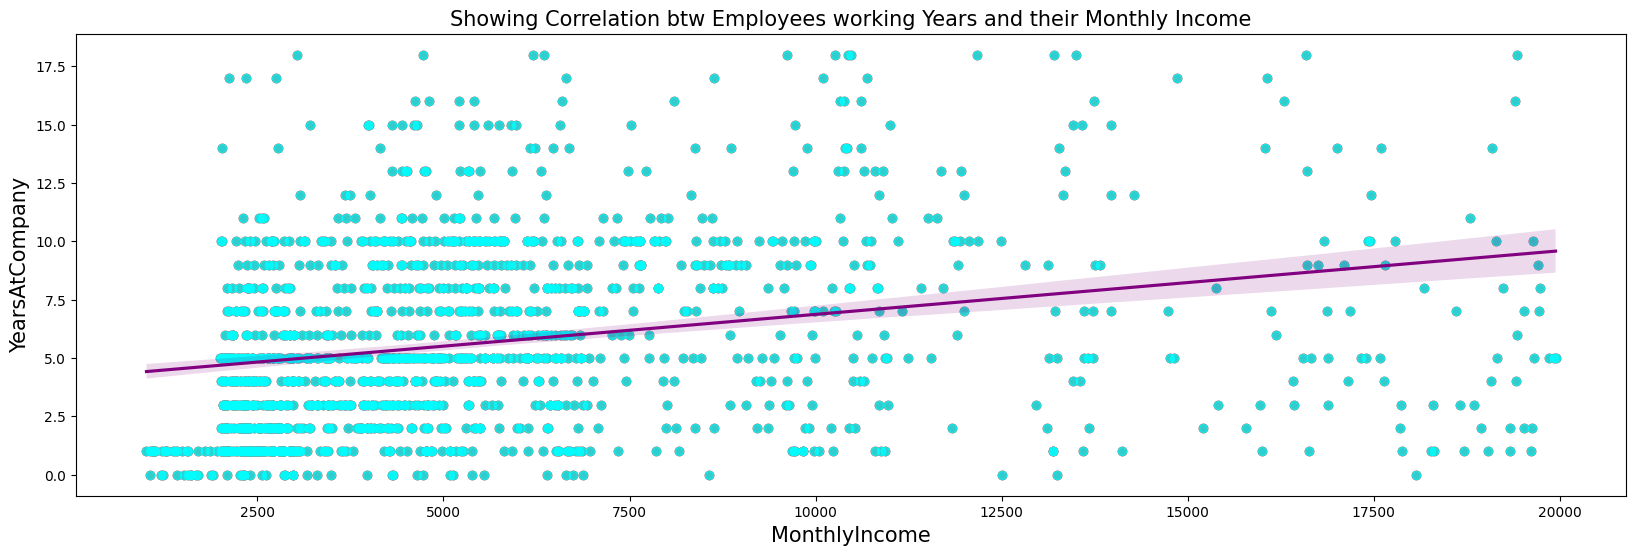

In [59]:
fig, ax = plt.subplots(figsize=(20,6))

y= data2['YearsAtCompany']
x = data2['MonthlyIncome']
plt.scatter(x, y, color='r')
sns.regplot(x, y, line_kws={'color': 'purple'}, scatter_kws={'color': 'cyan'})
# plt.title('Scatter Plot with Regression Line')
plt.title('Showing Correlation btw Employees working Years and their Monthly Income', fontsize=15)
plt.ylabel('YearsAtCompany', fontsize=15)
lplt.xlabel('MonthlyIncome', fontsize=15)
plt.show()

Again a positive correlation.

Let's then find out the correlation of each feature with one another

In [33]:
#correlation of features of the data
corr = data2.corr()
corr

,Age,Education,EmployeeCount,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
Age,1.000000,0.212784,NaN,0.015493,0.001871,0.459062,0.020458,0.037165,-0.019551,0.150222,0.119274
Education,0.212784,1.000000,NaN,-0.023642,-0.009606,0.111962,-0.011373,-0.001342,0.007281,0.081606,0.077089
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.015493,-0.023642,NaN,1.000000,-0.012973,0.007778,-0.032146,0.005254,0.024590,0.013129,0.012839
JobSatisfaction,0.001871,-0.009606,NaN,-0.012973,1.000000,0.002864,0.013559,-0.019431,-0.018623,0.020241,-0.010054
MonthlyIncome,0.459062,0.111962,NaN,0.007778,0.002864,1.000000,-0.005119,-0.001043,0.032481,0.277209,0.180043
PercentSalaryHike,0.020458,-0.011373,NaN,-0.032146,0.013559,-0.005119,1.000000,-0.041743,-0.009034,-0.009553,-0.021533
RelationshipSatisfaction,0.037165,-0.001342,NaN,0.005254,-0.019431,-0.001043,-0.041743,1.000000,0.017779,-0.025335,-0.001574
WorkLifeBalance,-0.019551,0.007281,NaN,0.024590,-0.018623,0.032481,-0.009034,0.017779,1.000000,0.013462,0.012833
YearsAtCompany,0.150222,0.081606,NaN,0.013129,0.020241,0.277209,-0.009553,-0.025335,0.013462,1.000000,0.549361


#### Obervation: 
Age has a high positive correlation with Monthly Income, and a negative correlation with WorkLifeBalance.
PercentSalaryHike has a highly negative correlation with YearsAtCompany, whereas has a positive correlation with Age and Job Satisfaction.


C:\Users\Lenovo\Downloads\New folder\lib\site-packages\seaborn\matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


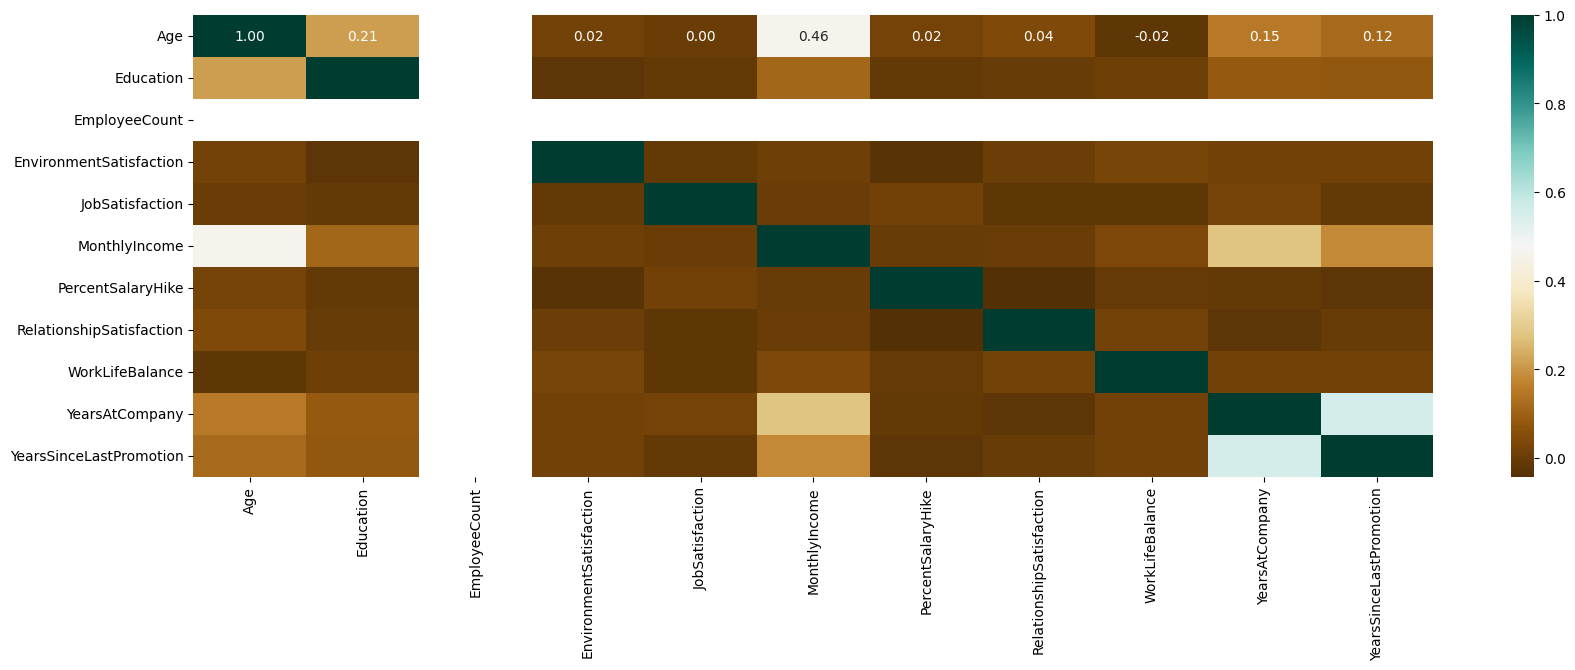

In [34]:
plt.figure(figsize=(20,6))
sns.heatmap(corr, cmap = 'BrBG', annot = True, fmt=".2f")
plt.show()

Heatmaps are used to study correlation. here the darkest shade of brown is the having less positive correlation. The color scale is mentioned on the side


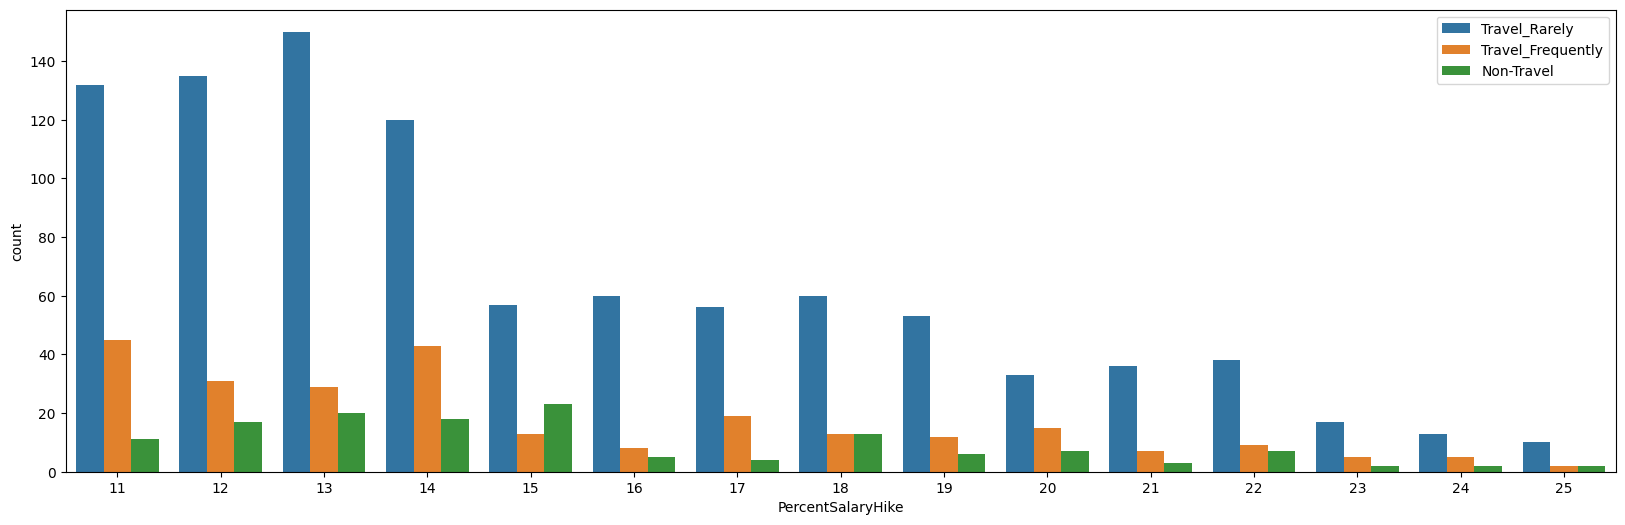

In [35]:
plt.figure(figsize=(20,6))
sns.countplot(data=data2, x='PercentSalaryHike',hue='BusinessTravel')
plt.legend()
plt.show()

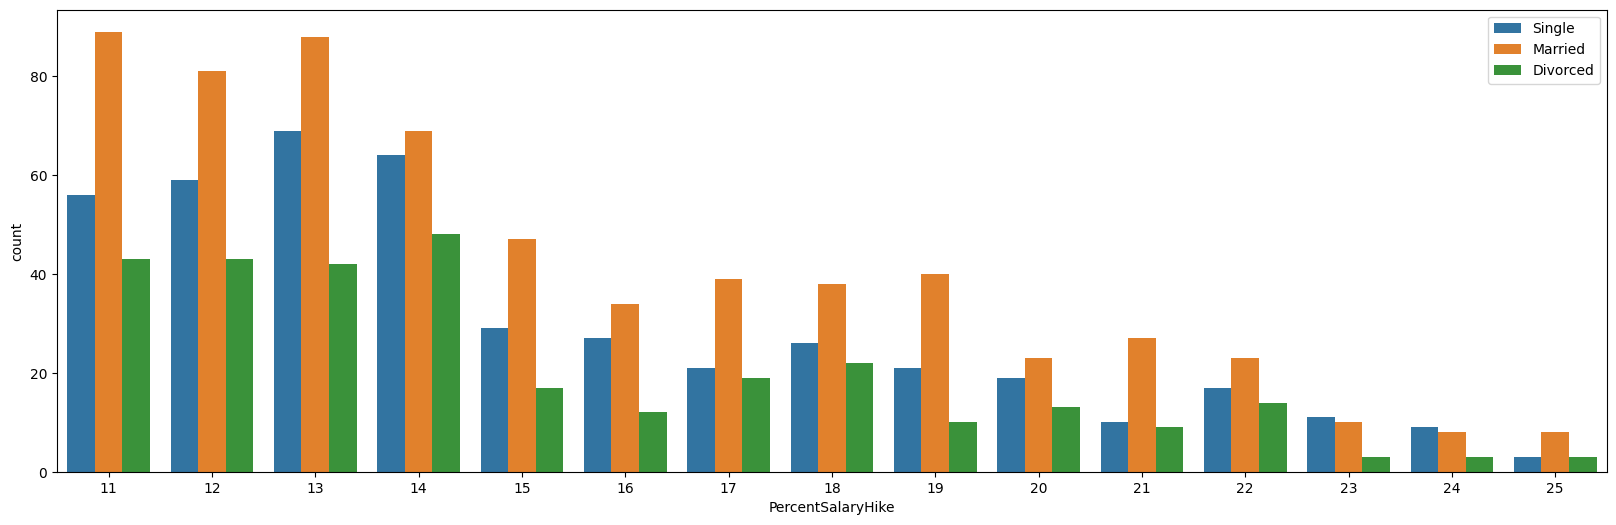

In [39]:
plt.figure(figsize=(20,6))
sns.countplot(data=data2, x='PercentSalaryHike',hue='MaritalStatus')
plt.legend()
plt.show()

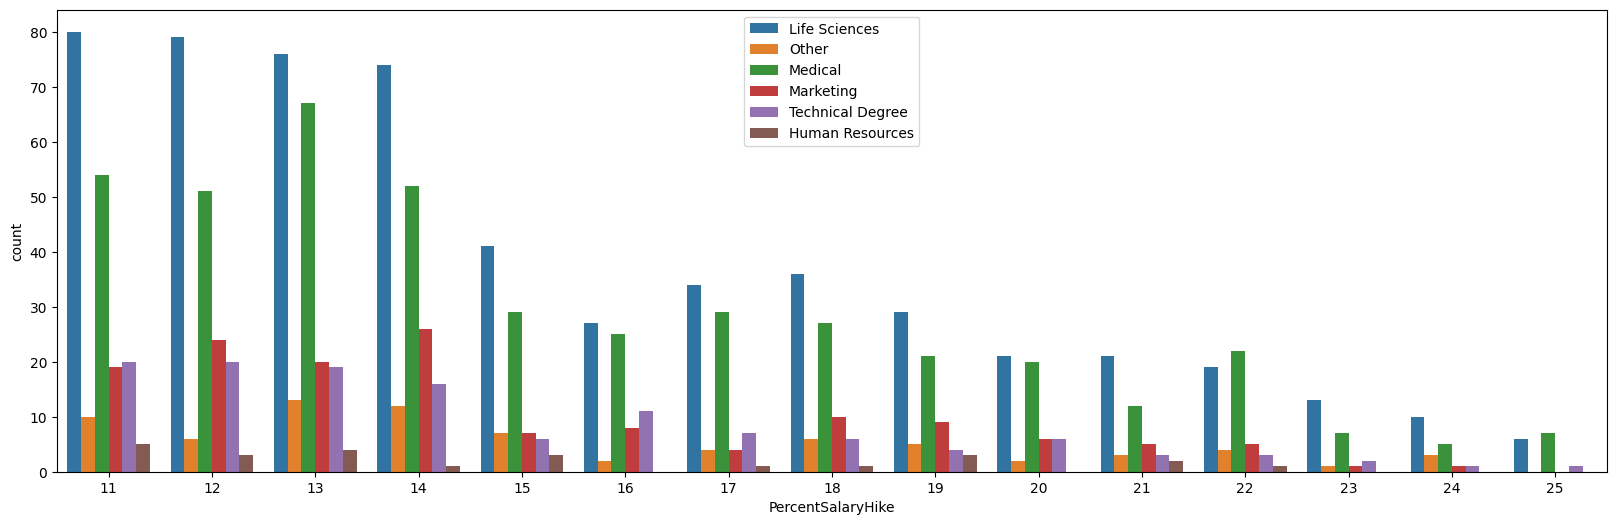

In [40]:
plt.figure(figsize=(20,6))
sns.countplot(data=data2, x='PercentSalaryHike',hue='EducationField')
plt.legend()
plt.show()

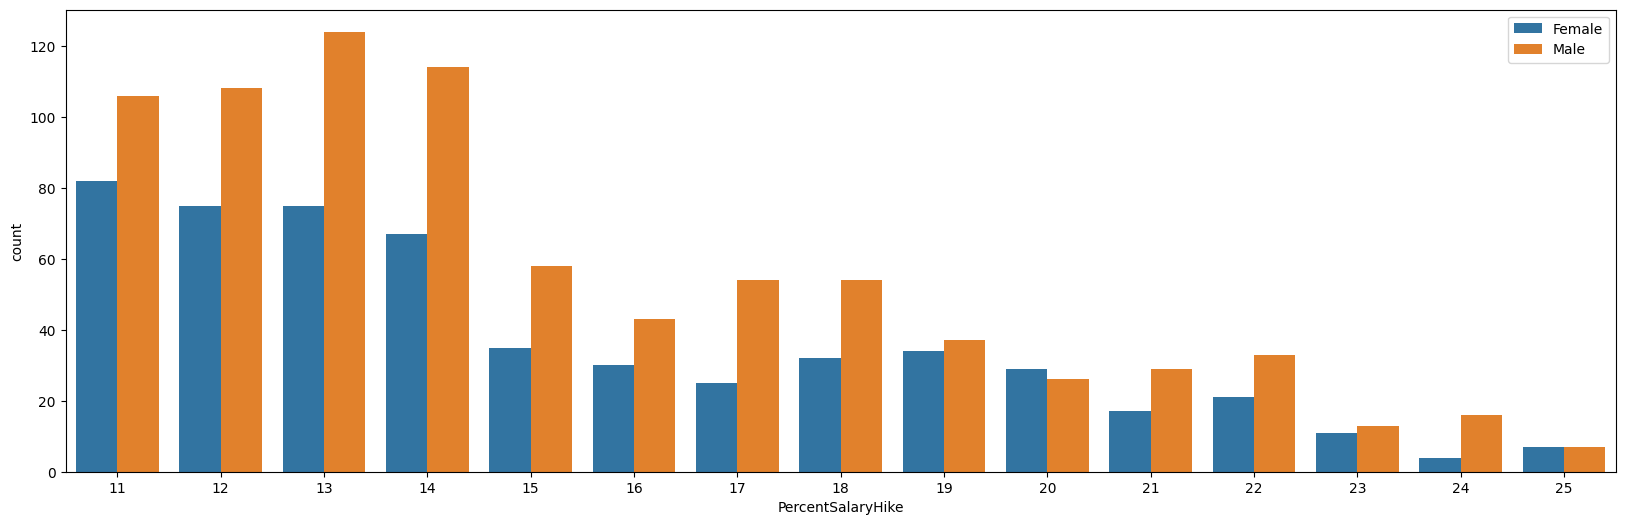

In [41]:
plt.figure(figsize=(20,6))
sns.countplot(data=data2, x='PercentSalaryHike',hue='Gender')
plt.legend()
plt.show()

#### Observation:
 1. Married ones have more salary hike, but a huge number of them have low salary hike.
 2. Life Science and Medical field employees have more salary hike but similarly a huge one of them have lower salary hikes.
 3. Male employees have more salary hikes as compared to females, and in case of both a huge number of them have lower salary hikes.

In [74]:
total_people = data2['Attrition'].count()

In [76]:
# total_people
leaving_count = data2['Attrition'].value_counts()['Yes']

In [78]:
# leaving_count
percent_Attrition = (leaving_count/total_people)*100

In [81]:
print("The Attrition rate or the % of people who have left is: ", round(percent_Attrition), "%")

The Attrition rate or the % of people who have left is:  17 %


### `Conclusion`: 
#### The Attrition Rate is found to be 17%, which means that the percent of Employees staying in the Company is 83%. 
#### Salary Hike and competition due to more number of employees from the same field is causing the most attrition here. Hiring other employees with other Educational Field might be beneficial in cutting down the attrition.